<a href="https://colab.research.google.com/github/asmaaabdelsattar/instant-training/blob/main/Copy_of_text_to_img2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install diffusers==0.30.0 transformers accelerate safetensors torch torchvision

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 10.0 MB/s eta 0:00:00
  Attempting uninstall: diffusers
    Found existing installation: diffusers 0.35.2
    Uninstalling diffusers-0.35.2:
      Successfully uninstalled diffusers-0.35.2


In [ ]:
from huggingface_hub import notebook_login
notebook_login()

In [ ]:
import torch
from diffusers import StableDiffusionPipeline

model_id = "runwayml/stable-diffusion-v1-5"
device = "cuda" if torch.cuda.is_available() else "cpu"

pipe = StableDiffusionPipeline.from_pretrained(
    model_id,
    torch_dtype=torch.float16 if device == "cuda" else torch.float32,
    safety_checker=None  # removes safety filter to make it faster (optional)
).to(device)

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

text_encoder/model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

unet/diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

config.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

vae/diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

`torch_dtype` is deprecated! Use `dtype` instead!
You have disabled the safety checker for <class 'diffusers.pipelines.stable_diffusion.pipeline_stable_diffusion.StableDiffusionPipeline'> by passing `safety_checker=None`. Ensure that you abide to the conditions of the Stable Diffusion license and do not expose unfiltered results in services or applications open to the public. Both the diffusers team and Hugging Face strongly recommend to keep the safety filter enabled in all public facing circumstances, disabling it only for use-cases that involve analyzing network behavior or auditing its results. For more information, please have a look at https://github.com/huggingface/diffusers/pull/254 .


  0%|          | 0/25 [00:00<?, ?it/s]

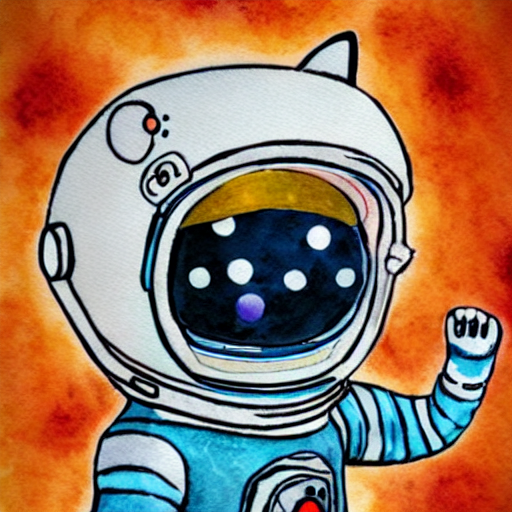

In [ ]:
prompt = "a cute cartoon cat astronaut, watercolor style"
image = pipe(prompt, num_inference_steps=25, guidance_scale=7.5).images[0]
image.save("output.png")
image

In [ ]:
!pip install streamlit diffusers transformers torch safetensors accelerate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 49.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 57.7 MB/s eta 0:00:00


In [ ]:
!pip install pyngrok

In [ ]:
import streamlit as st
import torch
from diffusers import StableDiffusionPipeline
from PIL import Image

# --- PAGE SETUP ---
st.set_page_config(page_title="Text-to-Image Generator", page_icon="🎨")
st.title("🖼️ Text-to-Image Generator using Stable Diffusion")

# --- LOAD MODEL ---
@st.cache_resource
def load_model():
    model_id = "runwayml/stable-diffusion-v1-5"
    device = "cuda" if torch.cuda.is_available() else "cpu"
    pipe = StableDiffusionPipeline.from_pretrained(
        model_id,
        torch_dtype=torch.float16 if device == "cuda" else torch.float32,
        use_safetensors=True,
    )
    pipe = pipe.to(device)
    return pipe

pipe = load_model()

# --- INPUT PROMPT ---
prompt = st.text_area("Enter your prompt:", "a fantasy castle floating in the sky, cinematic lighting")

if st.button("Generate Image"):
    with st.spinner("Generating... Please wait ⏳"):
        result = pipe(prompt, num_inference_steps=30, guidance_scale=7.5)
        image = result.images[0]

        st.image(image, caption="Generated Image", use_column_width=True)
        st.success("✅ Done!")
        st.download_button("Download Image", data=image.tobytes(), file_name="generated.png", mime="image/png")

2025-10-28 02:55:15.204 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-28 02:55:15.208 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-28 02:55:15.628 
  command:

    streamlit run /usr/local/lib/python3.12/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-10-28 02:55:15.630 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-28 02:55:15.632 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-28 02:55:15.638 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-28 02:55:15.639 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when runn

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

safety_checker/model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

2025-10-28 02:58:13.104 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-28 02:58:13.107 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-28 02:58:13.108 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-28 02:58:13.111 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-28 02:58:13.114 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-28 02:58:13.116 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-28 02:58:13.117 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-28 02:58:13.120 Session state does not function when running a script without `streamlit run`
2025-10-28 02:58

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import nbformat

path = "/content/drive/MyDrive/Colab Notebooks/text_to_img2.ipynb"

with open(path, "r", encoding="utf-8") as f:
    nb = nbformat.read(f, as_version=4)

if "widgets" in nb["metadata"]:
    del nb["metadata"]["widgets"]

with open(path, "w", encoding="utf-8") as f:
    nbformat.write(nb, f)

print("Cleaned notebook metadata successfully!")

Cleaned notebook metadata successfully!
